Importing the Libraries

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import seaborn as sns

Importing datasets

In [ ]:
#load the json file
with open('CETM47.json', 'r') as f:
    data = json.load(f)


In [ ]:
# get the number of elements in the list
print(len(data))

6443


In [ ]:
# Print the first tweet
print(data[0])

{'text': 'The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard', 'date': '2019-09-08', 'label': 4, 'id': 1170516324419866624, 'label_name': 'sports_&_gaming'}


Data Preprocessing (Cleaning texts)

In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Extract the relevant fields from the JSON objects
text = []
label = []
# Convert to lowercase and extract labels
for obj in data:
    text.append(obj['text'].lower())
    label.append(obj['label'])
# Remove URLs, mentions, hashtags, non-alphanumeric characters, and numbers
for i in range(len(text)):
    text[i] = re.sub(r"http\S+", "", text[i])
    text[i] = re.sub(r"@\S+", "", text[i])
    text[i] = re.sub(r"#\S+", "", text[i])
    text[i] = re.sub(r'[^\w\s]', '', text[i])
    text[i] = re.sub(r'\d+', '', text[i])

# Preprocess the text data
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

corpus = []
for i in range(len(text)):
    # Tokenize the text
    words = word_tokenize(text[i])

    # Remove stop words
    words = [w for w in words if not w.lower() in stop_words]

    # Stem the words
    words = [ps.stem(w) for w in words]

    # Join the processed words back into a string
    text[i] = ' '.join(words)
    corpus.append(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Feature Extraction

In [ ]:
#Term Frequency-Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

Splitting the data into Training and Test sets

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=0)

In [ ]:
print(X_train)

  (0, 3099)	0.3709129568992638
  (0, 12544)	0.3882546532197409
  (0, 3795)	0.25907142613832634
  (0, 2899)	0.23439801908388286
  (0, 9242)	0.28768660228319765
  (0, 5576)	0.2670784423911645
  (0, 12850)	0.2027492240791666
  (0, 11820)	0.19675946951959222
  (0, 1809)	0.21804412384484012
  (0, 3653)	0.20778679104907719
  (0, 4592)	0.16251029264552141
  (0, 3712)	0.23439801908388286
  (0, 6672)	0.24890623675848048
  (0, 8038)	0.14214994421445598
  (0, 12829)	0.16556254356215358
  (0, 1153)	0.22009092039964373
  (0, 13256)	0.16007169574131505
  (1, 3550)	0.2792830743775119
  (1, 2995)	0.2579579536939412
  (1, 6729)	0.2366328330103706
  (1, 554)	0.2579579536939412
  (1, 3549)	0.26680867845427
  (1, 11842)	0.22169587148944567
  (1, 157)	0.24074101254658808
  (1, 18)	0.26680867845427
  :	:
  (5152, 4246)	0.2910443920453339
  (5152, 12805)	0.26724691596905586
  (5153, 11481)	0.24132968640940006
  (5153, 5816)	0.24132968640940006
  (5153, 10218)	0.24132968640940006
  (5153, 7901)	0.241329686409

Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

Make Predictions on the Test Data

In [ ]:
NB_pred = NB_classifier.predict(X_test)
print(NB_pred)

[2 2 2 ... 2 4 2]


Evaluate classifier performance of Naives Bayes

In [ ]:

NB_accuracy = accuracy_score(y_test, NB_pred)
NB_precision = precision_score(y_test, NB_pred, average='weighted', zero_division= 1)
NB_recall = recall_score(y_test, NB_pred, average='weighted')
NB_f1 = f1_score(y_test, NB_pred, average='weighted')

print('Naive Bayes classifier results:')
print(f'Accuracy: {NB_accuracy}')
print(f'Precision: {NB_precision}')
print(f'Recall: {NB_recall}')
print(f'F1 score: {NB_f1}')


Naive Bayes classifier results:
Accuracy: 0.682699767261443
Precision: 0.7590084001696075
Recall: 0.682699767261443
F1 score: 0.5919106865677212


Generate the Naives Bayes Classification report

In [ ]:

report = classification_report(y_test, NB_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        65
           2       0.62      0.92      0.74       486
           3       0.91      0.06      0.11       168
           4       0.76      0.91      0.83       463
           5       0.00      0.00      0.00        78

    accuracy                           0.68      1289
   macro avg       0.38      0.32      0.28      1289
weighted avg       0.63      0.68      0.59      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Get the confusion matrix of Naives Bayes

In [ ]:
from sklearn.metrics import confusion_matrix

# get the confusion matrix
NB_cm = confusion_matrix(y_test, NB_pred)

print('Confusion Matrix:')
print(NB_cm)


Confusion Matrix:
[[  0   0  20   0   9   0]
 [  0   0  44   1  20   0]
 [  0   0 448   0  38   0]
 [  0   0 119  10  39   0]
 [  0   0  41   0 422   0]
 [  0   0  53   0  25   0]]


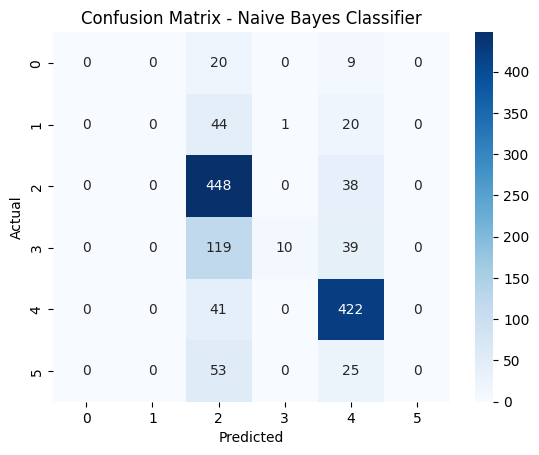

In [ ]:

cm = confusion_matrix(y_test, NB_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt= 'd', cmap="Blues")

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes Classifier")

# Display the plot
plt.show()

Training the Random Forest model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# train a Random Forest classifier
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
RF_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


# make predictions on test data

In [ ]:
RF_pred = RF_classifier.predict(X_test)
print(RF_pred)

[3 3 2 ... 2 4 5]



Evaluate the Random Forest classifier performance

In [ ]:
RF_accuracy = accuracy_score(y_test, RF_pred)
from sklearn.metrics import precision_score
RF_precision = precision_score(y_test, RF_pred, average='weighted', zero_division= 1)
RF_recall = recall_score(y_test, RF_pred, average='weighted')
RF_f1 = f1_score(y_test, RF_pred, average='weighted')

print('Random Forest classifier results:')
print(f'Accuracy: {RF_accuracy}')
print(f'Precision: {RF_precision}')
print(f'Recall: {RF_recall}')
print(f'F1 score: {RF_f1}')

Random Forest classifier results:
Accuracy: 0.7183863460046548
Precision: 0.7443203374420714
Recall: 0.7183863460046548
F1 score: 0.6942313757954667


Generate the Random Forest Classification Report

In [ ]:
report = classification_report(y_test, RF_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        29
           1       0.88      0.22      0.35        65
           2       0.64      0.90      0.75       486
           3       0.63      0.41      0.50       168
           4       0.84      0.82      0.83       463
           5       0.87      0.35      0.50        78

    accuracy                           0.72      1289
   macro avg       0.81      0.46      0.51      1289
weighted avg       0.74      0.72      0.69      1289



## Making the Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix

# get the confusion matrix
RF_cm = confusion_matrix(y_test, RF_pred)

print('Confusion Matrix:')
print(RF_cm)


Confusion Matrix:
[[  2   0  19   5   3   0]
 [  0  14  39   7   5   0]
 [  0   1 436  15  31   3]
 [  0   0  77  69  22   0]
 [  0   0  77   7 378   1]
 [  0   1  31   6  13  27]]


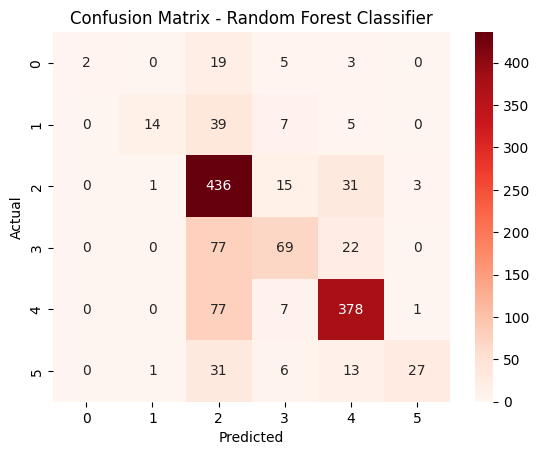

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, RF_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt = 'd', cmap="Reds")

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")

# Display the plot
plt.show()

Training the Survey Vector Machine model on the Training set

In [ ]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel='linear')
SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear')

Make predictions on the Test data

In [ ]:
SVM_pred = SVM_classifier.predict(X_test)
print(SVM_pred)

[3 3 2 ... 2 4 5]



Evaluate SVM classifier performance

In [ ]:

SVM_accuracy = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred, average='weighted')
SVM_recall = recall_score(y_test, SVM_pred, average='weighted')
SVM_f1 = f1_score(y_test, SVM_pred, average='weighted')

print('SVM classifier results:')
print(f'Accuracy: {SVM_accuracy}')
print(f'Precision: {SVM_precision}')
print(f'Recall: {SVM_recall}')
print(f'F1 score: {SVM_f1}')



SVM classifier results:
Accuracy: 0.7688130333591932
Precision: 0.7679196552712885
Recall: 0.7688130333591932
F1 score: 0.7526300181109333



Generate classification report for SVM

In [ ]:

report = classification_report(y_test, SVM_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        29
           1       0.89      0.38      0.54        65
           2       0.73      0.89      0.80       486
           3       0.58      0.51      0.54       168
           4       0.86      0.89      0.87       463
           5       0.83      0.44      0.57        78

    accuracy                           0.77      1289
   macro avg       0.73      0.53      0.58      1289
weighted avg       0.77      0.77      0.75      1289



In [ ]:
from sklearn.metrics import confusion_matrix

# get the confusion matrix
SVM_cm = confusion_matrix(y_test, RF_pred)

print('Confusion Matrix:')
print(SVM_cm)


Confusion Matrix:
[[  2   0  19   5   3   0]
 [  0  14  39   7   5   0]
 [  0   1 436  15  31   3]
 [  0   0  77  69  22   0]
 [  0   0  77   7 378   1]
 [  0   1  31   6  13  27]]


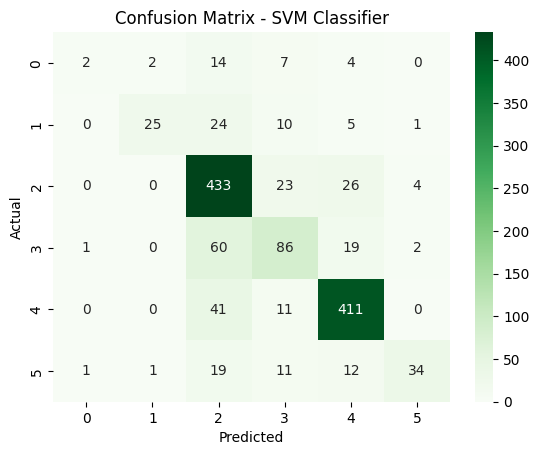

In [ ]:

cm = confusion_matrix(y_test, SVM_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt= 'd', cmap="Greens")

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Classifier")

# Display the plot
plt.show()


Training the Logistics Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
LGR_classifier = LogisticRegression(random_state = 0, max_iter=1000)
LGR_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
LGR_pred = LGR_classifier.predict(X_test)
print(LGR_pred)

[3 3 2 ... 2 4 2]


Evaluate LGR classifier performance

In [ ]:
LGR_accuracy = accuracy_score(y_test, LGR_pred)
LGR_precision = precision_score(y_test, LGR_pred, average='weighted')
LGR_recall = recall_score(y_test, LGR_pred, average='weighted')
LGR_f1 = f1_score(y_test, LGR_pred, average='weighted')

# Print the classification report and evaluation metrics
print('LGRoost classifier results:')
print(f'Classification Report:\n{report}')
print(f'Accuracy: {LGR_accuracy}')
print(f'Precision: {LGR_precision}')
print(f'Recall: {LGR_recall}')
print(f'F1 score: {LGR_f1}')


LGRoost classifier results:
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        29
           1       0.89      0.38      0.54        65
           2       0.73      0.89      0.80       486
           3       0.58      0.51      0.54       168
           4       0.86      0.89      0.87       463
           5       0.83      0.44      0.57        78

    accuracy                           0.77      1289
   macro avg       0.73      0.53      0.58      1289
weighted avg       0.77      0.77      0.75      1289

Accuracy: 0.7362296353762606
Precision: 0.7537023949101573
Recall: 0.7362296353762606
F1 score: 0.7018738945907277


Generate LGR classification report

In [ ]:
report = classification_report(y_test, LGR_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       1.00      0.17      0.29        65
           2       0.69      0.90      0.78       486
           3       0.62      0.39      0.48       168
           4       0.80      0.90      0.85       463
           5       0.84      0.27      0.41        78

    accuracy                           0.74      1289
   macro avg       0.83      0.44      0.48      1289
weighted avg       0.75      0.74      0.70      1289



In [ ]:
from sklearn.metrics import confusion_matrix

# get the confusion matrix
LGR_cm = confusion_matrix(y_test, RF_pred)

print('Confusion Matrix:')
print(LGR_cm)

Confusion Matrix:
[[  2   0  19   5   3   0]
 [  0  14  39   7   5   0]
 [  0   1 436  15  31   3]
 [  0   0  77  69  22   0]
 [  0   0  77   7 378   1]
 [  0   1  31   6  13  27]]


Make predictions on test data

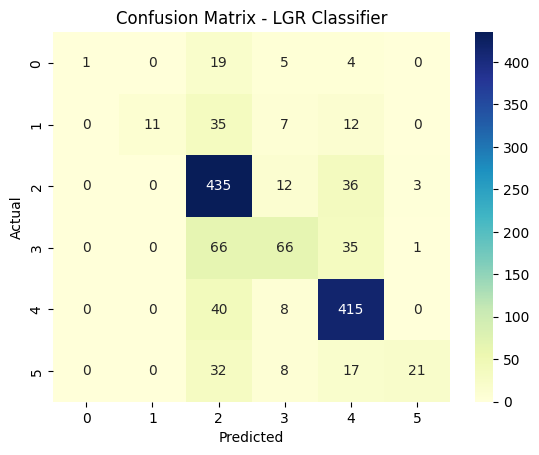

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, LGR_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt = 'd', cmap="YlGnBu")

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGR Classifier")

# Display the plot
plt.show()


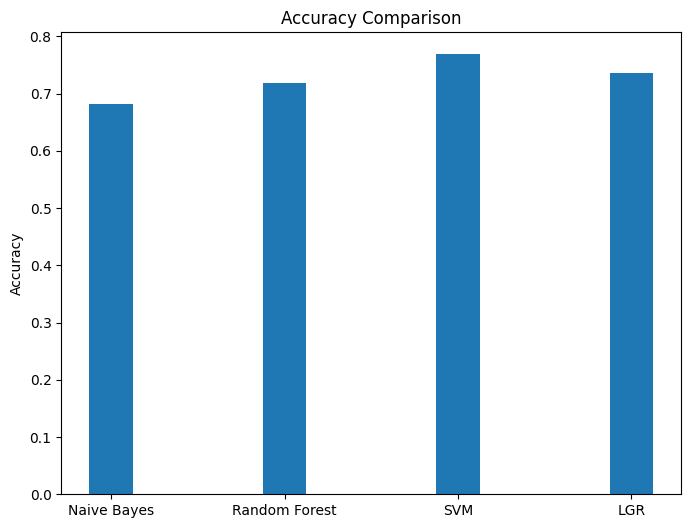

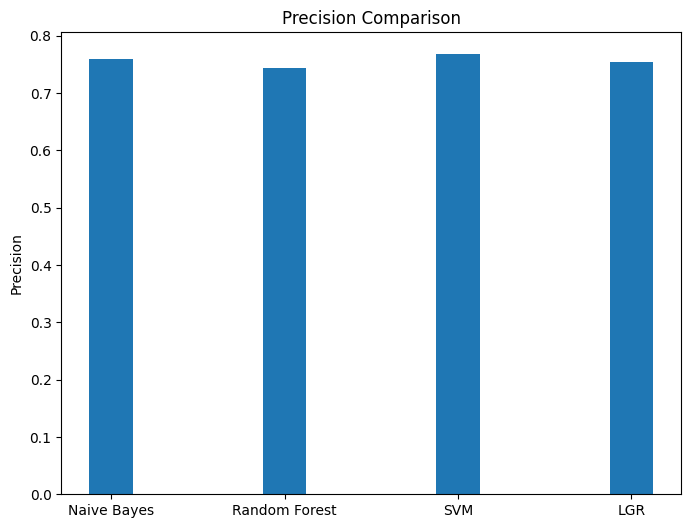

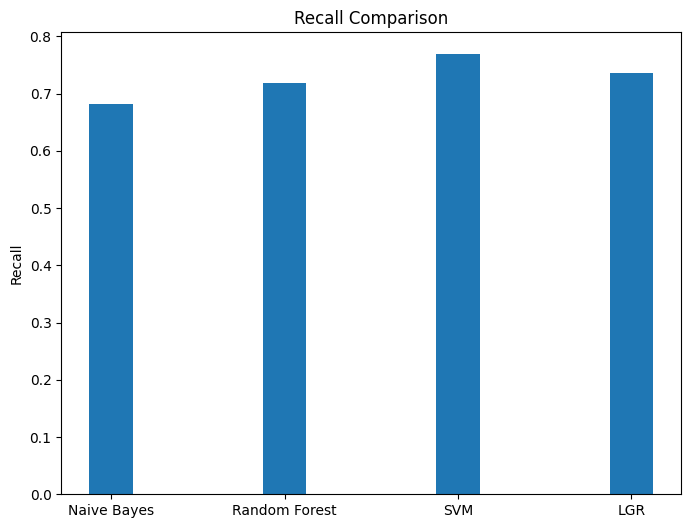

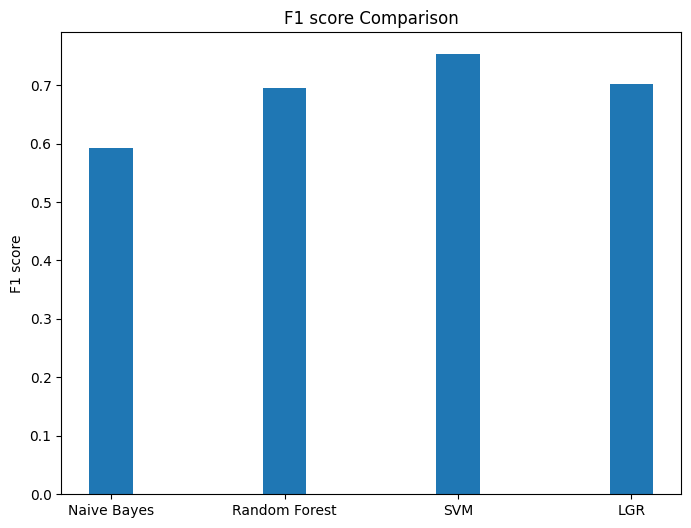

In [ ]:

# Define the classifiers and their corresponding metrics
classifiers = ['Naive Bayes', 'Random Forest', 'SVM', 'LGR']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
scores = [[NB_accuracy, RF_accuracy, SVM_accuracy, LGR_accuracy],
          [NB_precision, RF_precision, SVM_precision, LGR_precision],
          [NB_recall, RF_recall, SVM_recall, LGR_recall],
          [NB_f1, RF_f1, SVM_f1, LGR_f1]]


# Set the width of each bar
width = 0.25

# Create a bar chart for each metric
for i in range(len(metrics)):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(classifiers, scores[i], width)
    ax.set_title(metrics[i] + ' Comparison')
    ax.set_ylabel(metrics[i])
    plt.show()